# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [242]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

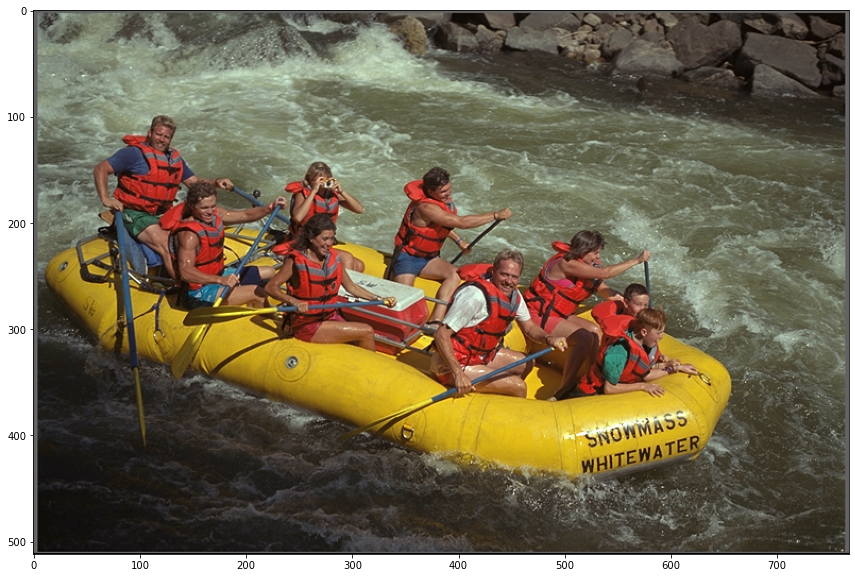

In [268]:
# Load image
img = cv2.imread('imgs/kodim14.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/255
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [355]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]]) / 255

Using the colour pallette, let's quantize the original image.

In [356]:
from tqdm import tqdm

# Prepare for quantization
rows, cols, channels = img.shape

print(f'Rows: {rows}, Cols: {cols}')

quantized = np.zeros_like(img)

R, G, B = 0, 1, 2

# Apply quantization
for r in tqdm(range(rows)):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c]
#         pixel = [200, 230, 250]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
                
        # Find closest value for every color separately - get a colored image as a result
#         new_pixel = [colors[np.abs(colors[:, R]-pixel[R]).argmin(),R], 
#                      colors[np.abs(colors[:, G]-pixel[G]).argmin(),G],
#                     colors[np.abs(colors[:, B]-pixel[B]).argmin(),B]]
        
        # Find closest value for all colors at once - get a grayscale image as a result
        new_pixel = colors[np.argmin([np.linalg.norm(pixel-color) for color in colors])]
#         print(new_pixel)
#         break
#     break
        # Apply quantization
        quantized[r, c] = new_pixel
print('Quantization done...')

Rows: 512, Cols: 768


100%|██████████| 512/512 [00:10<00:00, 50.53it/s]

Quantization done...


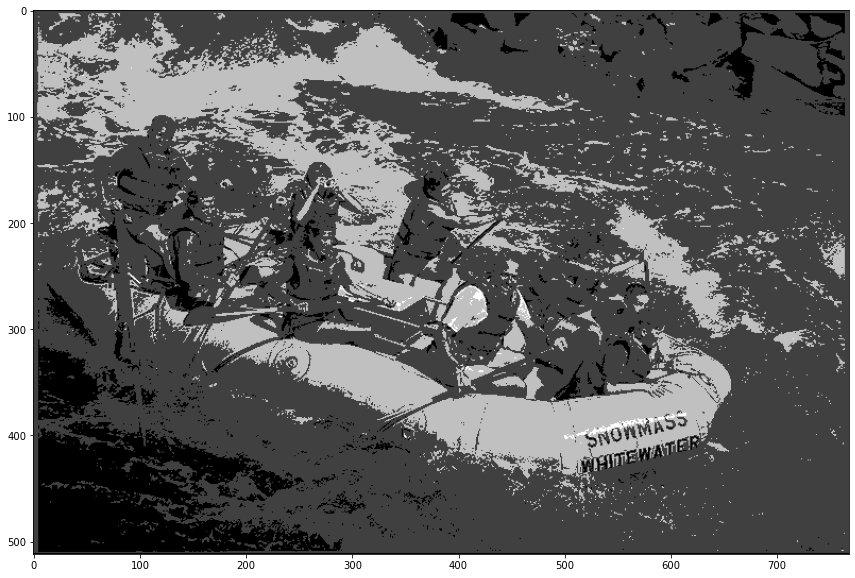

In [357]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized)

In [247]:
# Compute average quantization error
avg_quant_error = np.average(quantized - img)
print(f'Avg. quantization error: {avg_quant_error}') 

Avg. quantization error: -0.014340442665781598


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [358]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in tqdm(range(0, rows-1)):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        
        # Colored
#         new_pixel = [colors[np.abs(colors[:, R]-pixel[R]).argmin(),R], 
#                      colors[np.abs(colors[:, G]-pixel[G]).argmin(),G],
#                     colors[np.abs(colors[:, B]-pixel[B]).argmin(),B]]
        
        # Grayscale
        new_pixel = colors[np.argmin([np.linalg.norm(pixel-color) for color in colors])]
                
        # Compute quantization error
        quant_error = img[r, c] - new_pixel

        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c] = new_pixel
        
        img_tmp[r, c + 1] = img_tmp[r, c + 1] + quant_error * 7/16
        img_tmp[r + 1, c + 1] = img_tmp[r + 1, c + 1] + quant_error * 1/16
        img_tmp[r + 1, c] = img_tmp[r + 1, c] + quant_error * 5/16
        img_tmp[r + 1, c - 1] = img_tmp[r + 1, c - 1] + quant_error * 3/16
                
        # Apply dithering
        dithering[r, c] = new_pixel

100%|██████████| 511/511 [00:15<00:00, 33.20it/s]


Avg. quantization error: -0.014340442665781598
Avg. dithering error: -0.009486252861604717


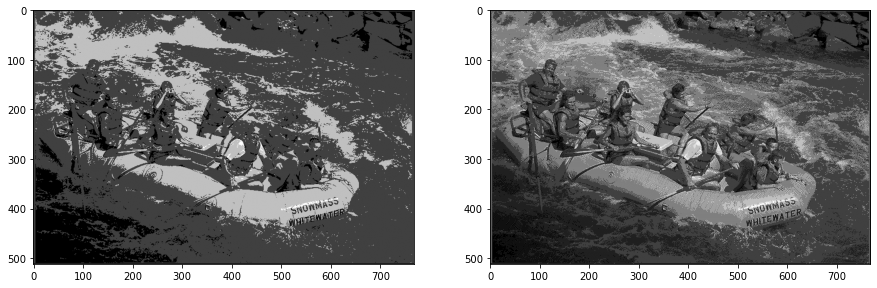

In [252]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

print(f'Avg. quantization error: {np.average(quantized - img)}') 
print(f'Avg. dithering error: {np.average(dithering - img)}')

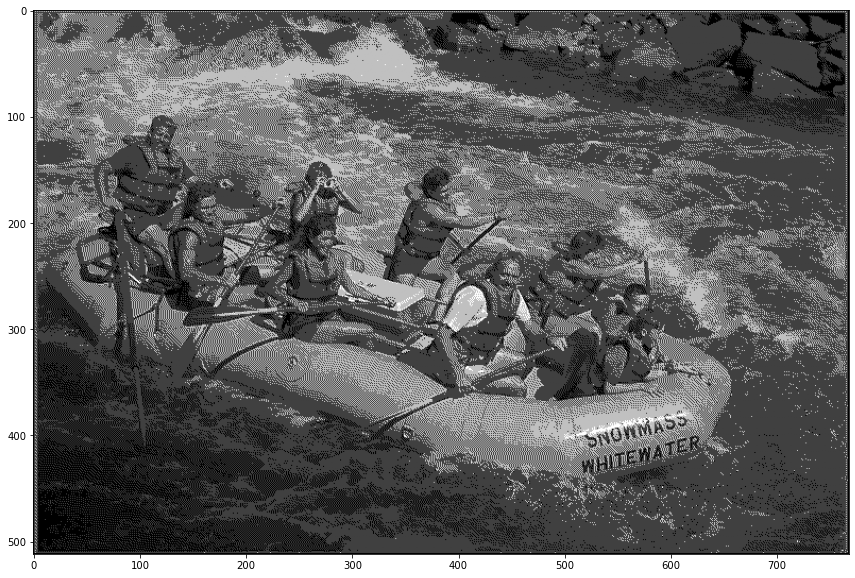

In [359]:
# just an bigger FSD-processed image
plt.imshow(dithering)

In [360]:
# Compute average quantization error for dithered image
avg_dith_error = np.average(dithering - img)
print(avg_dith_error)

-0.00999814035586023


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
* Which image looks better to you?
* Can you repeat the same process using only two colours: black and white? Show me :-)

### Answers
* Dithered should have a higher error, but in my case, I'm getting lower error for it than for quantized
* Dithered looks better, definitely
* Run the cell below to see the same in two colors. The lower number of colors - the more visible is "grain"

100%|██████████| 512/512 [00:20<00:00, 24.65it/s]

Avg. quantization error: -0.13113814543015564
Avg. FSD error: -0.05375319669968684


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1ba84c2e2b0>)

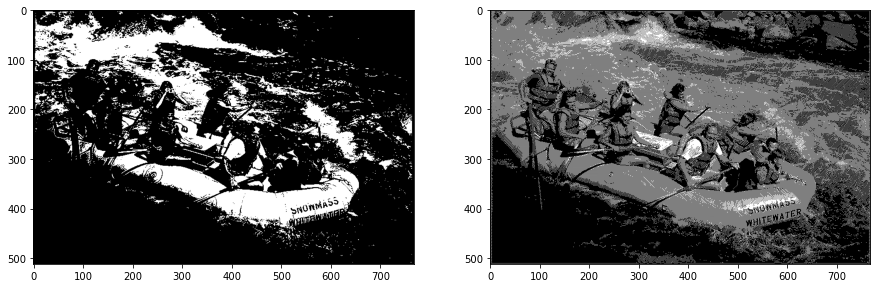

In [347]:
# The copy-paste of the code to show how it looks like in two colors
# This cell is autonomous - it has all the modules (except very common like numpy) included and all the required data inside

from tqdm import tqdm

# Load image
img_original = cv2.imread('imgs/kodim14.png')
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_original = img_original / 255

img_tmp = np.copy(img_original)

# Black, white
two_colors = np.array([[0, 0, 0],
#                        [255, 0, 0],
#                        [0, 255, 0],
#                        [0, 0, 255],
                   [255, 255, 255]]) / 255

# Prepare for quantization
rows2, cols2, channels = img_original.shape

quantized2cols = np.zeros_like(img_original)
fsdimg = np.zeros_like(img_original)

# Apply quantization
for r in tqdm(range(rows2)):
    for c in range(cols2):
        
        # Quantized img calculations
        pixel = img_original[r, c]
        new_pixel = two_colors[np.argmin([np.linalg.norm(pixel-color) for color in two_colors])]
        quantized2cols[r, c] = new_pixel
        
        
        # Dightering img calculations
        pixel = img_tmp[r, c]
        new_pixel = two_colors[np.argmin([np.linalg.norm(pixel-color) for color in two_colors])]
        
        quant_error = img_original[r, c] - new_pixel
#         quant_error = img_tmp[r, c] - new_pixel
        
        
        img_tmp[r, c] = new_pixel
        
        #  these conditions could be more precise for each neighbor pixel but it works well this way
        if r in range(0, rows2-1) and c in range(1, cols2-1): 
            img_tmp[r, c + 1] = img_tmp[r, c + 1] + quant_error * 7/16
            img_tmp[r + 1, c + 1] = img_tmp[r + 1, c + 1] + quant_error * 1/16
            img_tmp[r + 1, c] = img_tmp[r + 1, c] + quant_error * 5/16
            img_tmp[r + 1, c - 1] = img_tmp[r + 1, c - 1] + quant_error * 3/16
        
        fsdimg[r, c] = new_pixel
        
print(f'Avg. quantization error: {np.average(quantized2cols - img_original)}')
print(f'Avg. FSD error: {np.average(fsdimg - img_original)}')

plt.subplot(121), plt.imshow(quantized2cols)   # optimally quantized
plt.subplot(122), plt.imshow(fsdimg)   # dithering

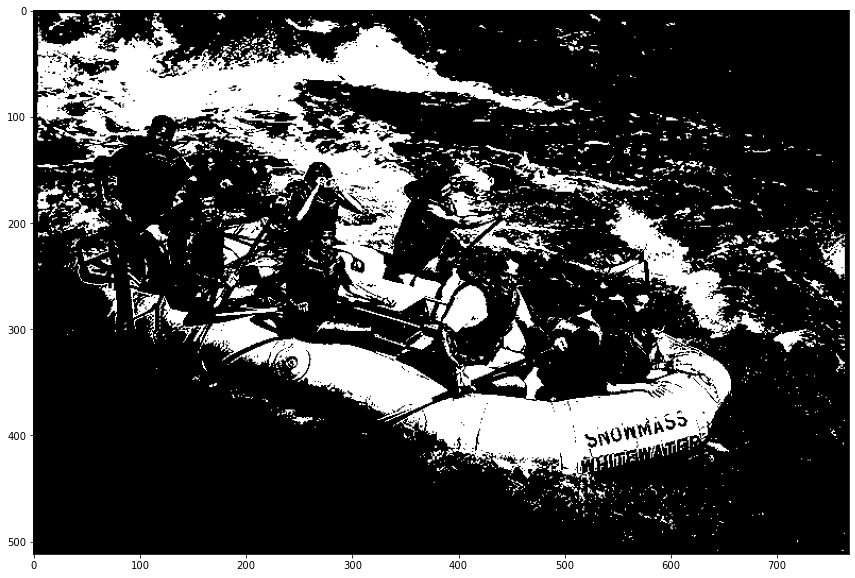

In [348]:
plt.imshow(quantized2cols)

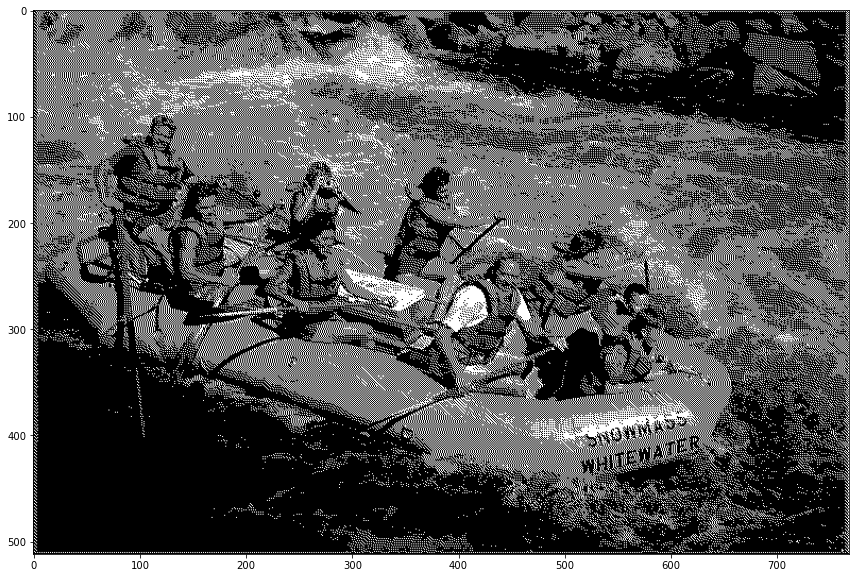

In [349]:
plt.imshow(fsdimg)
# print(fsdimg[:20,:20])

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

Calculating clusters...
Extracting cluster centers...
16 colors in total


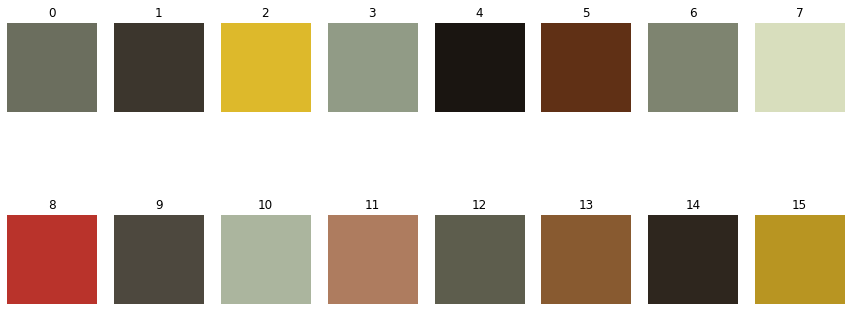

In [350]:
from sklearn.cluster import KMeans

img2 = cv2.imread('imgs/kodim14.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)/255

print(f'Calculating clusters...')
kmeans = KMeans(n_clusters=16).fit(np.reshape(img2*255, (-1, 3)))
print(f'Extracting cluster centers...')
colors = kmeans.cluster_centers_

palette = colors/255
print(f'{len(palette)} colors in total')
# print(palette)

for color_index in range(len(palette)):
    color = np.zeros((50, 50, 3), dtype=np.float32)
    color[...,] = palette[color_index]
    plt.subplot(len(palette)//8+1, 8, color_index+1), plt.imshow(color), plt.title(color_index), plt.axis('off')

In [351]:
# Load image
img_tmp = np.copy(img2)

rows, cols, channels = img2.shape

quantized = np.zeros_like(img2)
fsdimg = np.zeros_like(img2)

# Apply quantization
for r in tqdm(range(rows)):
    for c in range(cols):
        
        # Quantized img calculations
        pixel = img2[r, c]
        new_pixel = palette[np.argmin([np.linalg.norm(pixel-color) for color in palette])]
        quantized[r, c] = new_pixel
        
        
        # Dightering img calculations
        pixel = img_tmp[r, c]
        new_pixel = palette[np.argmin([np.linalg.norm(pixel-color) for color in palette])]
        quant_error = img2[r, c] - new_pixel
        
        img_tmp[r, c] = new_pixel
        
        #  these range() conditions could be more precise for each neighbor pixel but it works well this way too
        if r in range(0, rows-1) and c in range(1, cols-1): 
            img_tmp[r, c + 1] = img_tmp[r, c + 1] + quant_error * 7/16
            img_tmp[r + 1, c + 1] = img_tmp[r + 1, c + 1] + quant_error * 1/16
            img_tmp[r + 1, c] = img_tmp[r + 1, c] + quant_error * 5/16
            img_tmp[r + 1, c - 1] = img_tmp[r + 1, c - 1] + quant_error * 3/16
        
        fsdimg[r, c] = new_pixel
        

100%|██████████| 512/512 [01:10<00:00,  7.22it/s]


Avg. quantization error: -3.969918658698897e-05
Avg. FSD error: 0.0003856176534885799


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1ba6bd75970>)

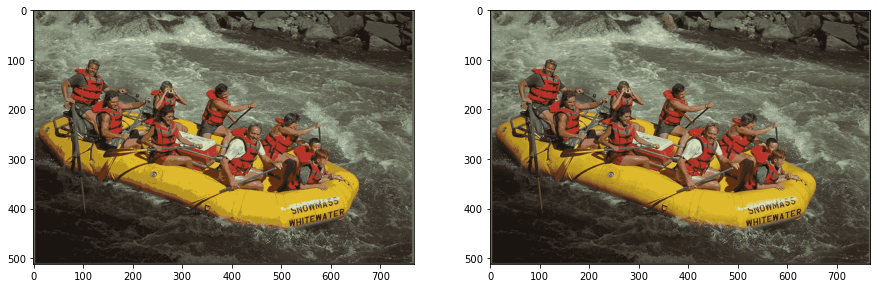

In [352]:
# print(fsdimg[:10, :10])

print(f'Avg. quantization error: {np.average(quantized - img2)}')
print(f'Avg. FSD error: {np.average(fsdimg - img2)}')

plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(fsdimg)   # dithering

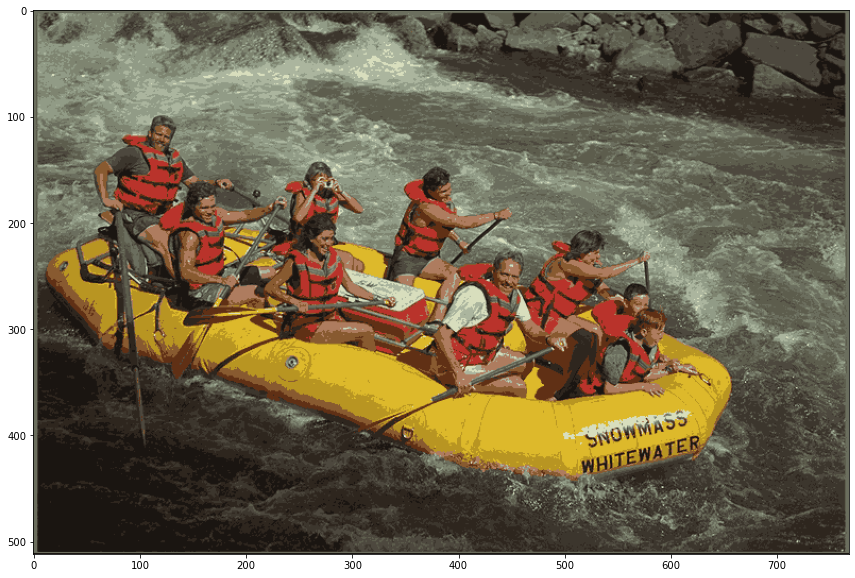

In [353]:
plt.imshow(quantized)

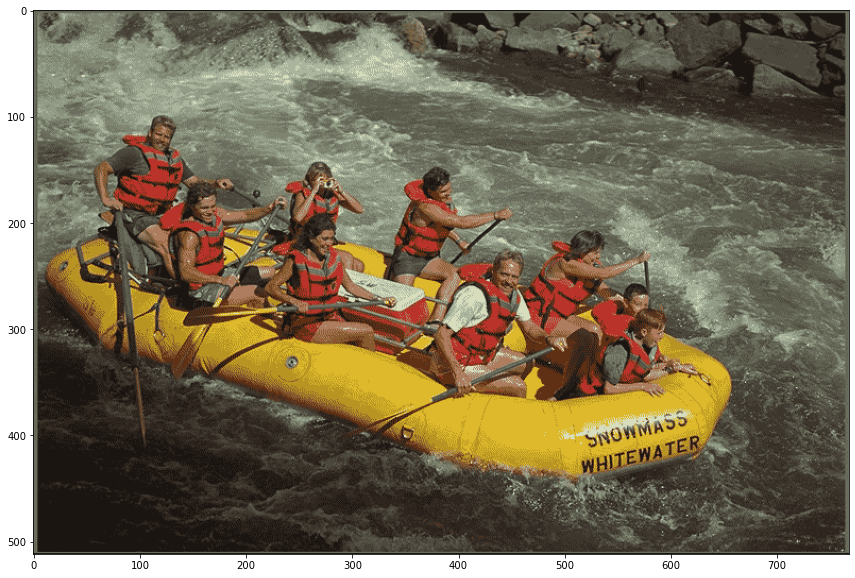

In [354]:
plt.imshow(fsdimg)

### Apply FS dithering the same way you did before.
* How does the result look like to you?
* What happens if we use 32 colours?
* And what happens if we use 256 colours?

### Answers
* Looks weird and grainy (for a low number of colors)
* More clusters - more distinctive colors - better image, more colored (obviously).
* 256 - it takes a very long time to calculate KMeans clusters, and then - to calculate images. At 256 colors both imgages look like original